# Pyber Rideshare Analysis

# Assesment

1. In general, there is significant scope for adding drivers in rural and suburban areas. Total rides and fares have comparitively higher share, while total drivers is low. However, these should be considered along with total rides and average fairs to prioritize growth. Not all cities in these categories may be worth the expenses.
2. There are selective cities (smaller sized bubbles, where larger bubbles are present) that have scope for adding more drivers
3. Port James has an exceptionally high number of rides (64) and failry high average fare (32). This market seems to be a good opportunity to expand and may be a possible opportunity for specialized services, like rideshare.
4. Some markets like Manuelchester need recosideration, especially if there is signifcant cost associated with maintaining these operations (low rides, minimal drivers)

In [228]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [229]:
#import data

city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv')


In [230]:
#city_df.head()

In [231]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [232]:
#check for nulls
#print(city_df.count())
#print(ride_df.count())

#no nulls

In [233]:
# merge city data and ride data for full view

merged_rides_df = pd.merge(city_df,ride_df, on='city')
#merged_rides_df.count()
#no nulls
merged_rides_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Bubble plot of ride sharing data

In [234]:
# extract series that need to be plotted. 
# rides per city (x axis)
# avergae fare per city (y axis)
# drivers per city (bubble plot size)

# separate into city types
rural_rides_df = merged_rides_df[merged_rides_df['type'] == 'Rural']
suburb_rides_df = merged_rides_df[merged_rides_df['type'] == 'Suburban']
urban_rides_df = merged_rides_df[merged_rides_df['type'] == 'Urban']

# group data set by city and extract series for each type
r_grouped_rides_by_city_df = rural_rides_df.groupby('city')
r_rides_per_city = r_grouped_rides_by_city_df['ride_id'].count()
r_averagefare_per_city = r_grouped_rides_by_city_df['fare'].mean()
r_drivers_per_city = r_grouped_rides_by_city_df['driver_count'].sum()

s_grouped_rides_by_city_df = suburb_rides_df.groupby('city')
s_rides_per_city = s_grouped_rides_by_city_df['ride_id'].count()
s_averagefare_per_city = s_grouped_rides_by_city_df['fare'].mean()
s_drivers_per_city = s_grouped_rides_by_city_df['driver_count'].sum()

u_grouped_rides_by_city_df = urban_rides_df.groupby('city')
u_rides_per_city = u_grouped_rides_by_city_df['ride_id'].count()
u_averagefare_per_city = u_grouped_rides_by_city_df['fare'].mean()
u_drivers_per_city = u_grouped_rides_by_city_df['driver_count'].sum()


r_rides_per_city.head()

city
East Leslie       11
East Stephen      10
East Troybury      7
Erikport           8
Hernandezshire     9
Name: ride_id, dtype: int64

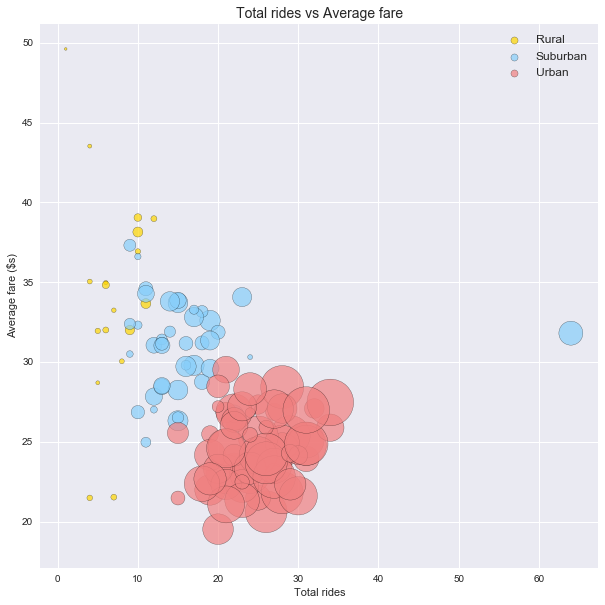

In [235]:
#using seaborn settings
sns.set()

fig, ax = plt.subplots(figsize=(10,10))
pyber_colors = ['gold','lightskyblue','lightcoral']
labels = ['Rural','Suburban','Urban']


ax.scatter(r_rides_per_city, r_averagefare_per_city, s= r_drivers_per_city, 
           marker="o", facecolors=pyber_colors[0], edgecolors="black", alpha=0.7, label=labels[0])
ax.scatter(s_rides_per_city, s_averagefare_per_city, s= s_drivers_per_city, 
           marker="o", facecolors=pyber_colors[1], edgecolors="black", alpha=0.7, label=labels[1])
ax.scatter(u_rides_per_city, u_averagefare_per_city, s= u_drivers_per_city, 
           marker="o", facecolors=pyber_colors[2], edgecolors="black", alpha=0.7, label=labels[2])

plt.title("Total rides vs Average fare", fontsize=14)
plt.xlabel("Total rides")
plt.ylabel("Average fare ($s)")
#plt.text(1, 1, "Circle size corelates to number of drivers", fontsize=12)
lgnd = plt.legend(loc='upper right', prop={'size': 12})
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.show()
plt.clf()
plt.cla()
plt.close()

In [236]:
#plot again after removing outliers to get a closer look at the majority cities

#remove max rides outlier
max_s_rides = s_rides_per_city.idxmax()
print("Dropping maximum rides outlier "+max_s_rides)
print(f"Rides : {str(s_rides_per_city[max_s_rides])} Average Fare : {str(round(s_averagefare_per_city[max_s_rides],0))}")
s_rides_per_city.drop(max_s_rides, inplace=True)
s_averagefare_per_city.drop(max_s_rides, inplace=True)
s_drivers_per_city.drop(max_s_rides, inplace=True)

#dropping rides less than five
print('--------------------')
min_r_rides = r_rides_per_city.idxmin()
print("Dropping minimum rides outlier "+min_r_rides)
#print(f"Rides : {str(s_rides_per_city[min_r_rides])} Average Fare : {str(round(r_averagefare_per_city[min_r_rides],0))}")
r_rides_per_city.drop(min_r_rides, inplace=True)
r_averagefare_per_city.drop(min_r_rides, inplace=True)
r_drivers_per_city.drop(min_r_rides, inplace=True)

Dropping maximum rides outlier Port James
Rides : 64 Average Fare : 32.0
--------------------
Dropping minimum rides outlier Manuelchester


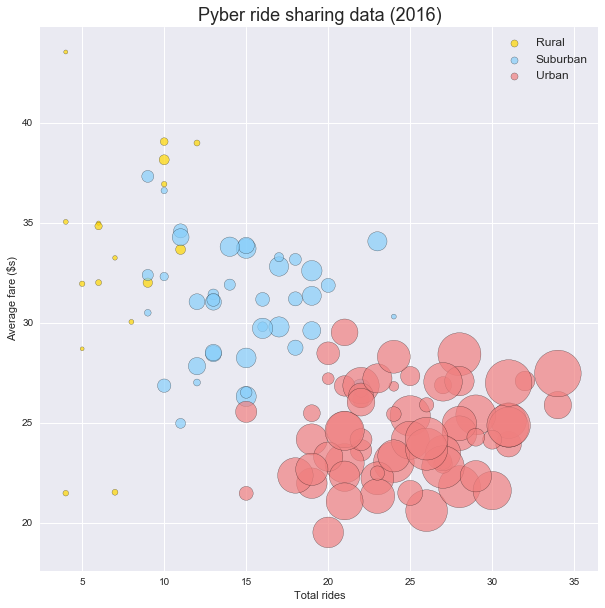

In [237]:


# redraw bubble plot
sns.set()

fig, ax = plt.subplots(figsize=(10,10))
pyber_colors = ['gold','lightskyblue','lightcoral']
labels = ['Rural','Suburban','Urban']

ax.scatter(r_rides_per_city, r_averagefare_per_city, s= r_drivers_per_city, 
           marker="o", facecolors=pyber_colors[0], edgecolors="black", alpha=0.7, label=labels[0])
ax.scatter(s_rides_per_city, s_averagefare_per_city, s= s_drivers_per_city, 
           marker="o", facecolors=pyber_colors[1], edgecolors="black", alpha=0.7, label=labels[1])
ax.scatter(u_rides_per_city, u_averagefare_per_city, s= u_drivers_per_city, 
           marker="o", facecolors=pyber_colors[2], edgecolors="black", alpha=0.7, label=labels[2])

plt.title("Pyber ride sharing data (2016)", fontsize=18)
plt.xlabel("Total rides")
plt.ylabel("Average fare ($s)")
lgnd = plt.legend(loc='upper right', prop={'size': 12})
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.show()
plt.clf()
plt.cla()
plt.close()

# Total Fares by City Type

Text(0.5,1,'% Total Fares by City type')

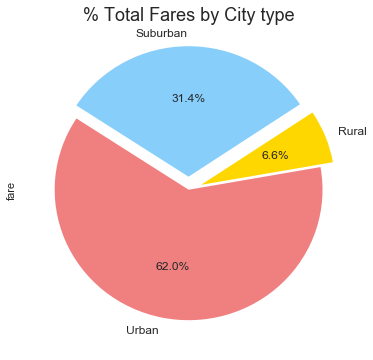

In [238]:
#% of Total Fares by City Type

total_fare = ride_df['fare'].sum()

#print(total_fare)

group_by_city_type = merged_rides_df.groupby('type')

fares_by_city_type = group_by_city_type['fare'].sum()
#print(fares_by_city_type)

fares_by_city_type.plot.pie(labels=labels, colors=pyber_colors, autopct='%1.1f%%', explode=(0.1,0.1,0), startangle=10, fontsize=12, figsize=(6, 6))
plt.title("% Total Fares by City type", fontsize=18)

Text(0.5,1,'% Total Rides by City type')

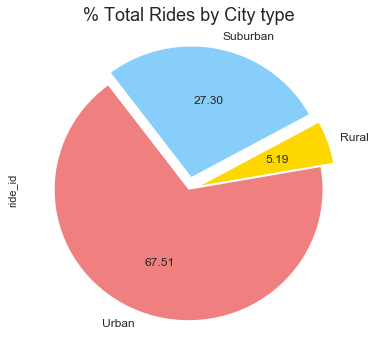

In [239]:
#% of Total Rides by City Type

total_rides = ride_df['ride_id'].count()

#print(total_fare)

group_by_city_type = merged_rides_df.groupby('type')
fares_by_city_type = group_by_city_type['ride_id'].count()
#print(fares_by_city_type)

fares_by_city_type.plot.pie(labels=labels, colors=pyber_colors, explode=(0.1,0.1,0), autopct='%.2f', startangle=10, fontsize=12, figsize=(6, 6))
plt.title("% Total Rides by City type", fontsize=18)

Text(0.5,1,'% Total Drivers by City type')

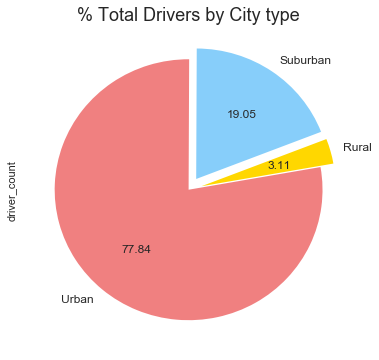

In [240]:
#% of Total Drivers by City Type

total_drivers = city_df['driver_count'].sum()

#print(total_fare)

group_by_city_type = city_df.groupby('type')
fares_by_city_type = group_by_city_type['driver_count'].sum()
#print(fares_by_city_type)

fares_by_city_type.plot.pie(labels=labels, colors=pyber_colors, explode=(0.1,0.1,0), autopct='%.2f', startangle=10, fontsize=12, figsize=(6, 6))
plt.title("% Total Drivers by City type", fontsize=18)